In [36]:
#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score , KFold , learning_curve
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
np.set_printoptions(suppress = True)

In [3]:
dataset = pd.read_csv('kc_house_data.csv')

In [4]:
dataset.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
dataset.shape

(21613, 21)

# Data Preprocessing

In [8]:
dataset['date'].head()

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

In [9]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### create new columns

In [10]:
dataset['age'] = dataset.apply(lambda rec: int(rec.date[0:4]) - rec.yr_built , axis = 1)

In [11]:
dataset[['date' , 'yr_built' , 'age']].head(10)

date  yr_built  age
0  20141013T000000      1955   59
1  20141209T000000      1951   63
2  20150225T000000      1933   82
3  20141209T000000      1965   49
4  20150218T000000      1987   28
5  20140512T000000      2001   13
6  20140627T000000      1995   19
7  20150115T000000      1963   52
8  20150415T000000      1960   55
9  20150312T000000      2003   12

In [12]:
dataset['year'] = dataset.apply(lambda rec: int(rec.date[0:4]) , axis = 1)

In [13]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age', 'year'],
      dtype='object')

In [14]:
dataset.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0      5650     1.0           0     0  ...              0      1955   
1      7242     2.0           0     0  ...            400      1951   
2     10000     1.0           0     0  ...              0      1933   
3      5000     1.0           0     0  ...            910      1965   
4      8080     1.0           0     0  ...              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  age  \
0             0    98178  47.5112 -122.257           1340        5650   59   
1          1991    98125  47.7210 -122.319           1690        7639   63   
2             0    98028  47.7379 -122.233           2720        8062   82   
3             0    98136  47.5208 -122.393           1360        5000   49   
4             0    98074  47.6168 -122.045           1800        7503   28   

   year  
0  2014  
1  2014  
2  2015  
3  2014  
4  2015  

[5 rows x 23 columns]

In [15]:
# Numeric features
features = ['bedrooms' , 'bathrooms' , 'sqft_living' ,
       'sqft_lot' , 'floors' , 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement' , 'sqft_living15', 'sqft_lot15', 'age', 'year']
            
target = ['price']

In [16]:
final_dataset = dataset[features + target]

In [17]:
final_dataset.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  condition  grade  \
0         3       1.00         1180      5650     1.0     0          3      7   
1         3       2.25         2570      7242     2.0     0          3      7   
2         2       1.00          770     10000     1.0     0          3      6   
3         4       3.00         1960      5000     1.0     0          5      7   
4         3       2.00         1680      8080     1.0     0          3      8   

   sqft_above  sqft_basement  sqft_living15  sqft_lot15  age  year     price  
0        1180              0           1340        5650   59  2014  221900.0  
1        2170            400           1690        7639   63  2014  538000.0  
2         770              0           2720        8062   82  2015  180000.0  
3        1050            910           1360        5000   49  2014  604000.0  
4        1680              0           1800        7503   28  2015  510000.0

In [18]:
final_dataset.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21613.000000  21613.000000  21613.000000  2.161300e+04  21613.000000   
mean       3.370842      2.114757   2079.899736  1.510697e+04      1.494309   
std        0.930062      0.770163    918.440897  4.142051e+04      0.539989   
min        0.000000      0.000000    290.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1427.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.068800e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   

               view     condition         grade    sqft_above  sqft_basement  \
count  21613.000000  21613.000000  21613.000000  21613.000000   21613.000000   
mean       0.234303      3.409430      7.656873   1788.390691     291.509045   
std        0.766318      0.650743      1.175459    828.090978     442.575043   
min        0.000000      1.000000      1.000000    290.000000       0.000000   
25%        0.000000      3.000000      7.000000   1190.000000       0.000000   
50%        0.000000      3.000000      7.000000   1560.000000       0.000000   
75%        0.000000      4.000000      8.000000   2210.000000     560.000000   
max        4.000000      5.000000     13.000000   9410.000000    4820.000000   

       sqft_living15     sqft_lot15           age          year         price  
count   21613.000000   21613.000000  21613.000000  21613.000000  2.161300e+04  
mean     1986.552492   12768.455652     43.317818   2014.322954  5.400881e+05  
std       685.391304   27304.179631     29.375493      0.467616  3.671272e+05  
min       399.000000     651.000000     -1.000000   2014.000000  7.500000e+04  
25%      1490.000000    5100.000000     18.000000   2014.000000  3.219500e+05  
50%      1840.000000    7620.000000     40.000000   2014.000000  4.500000e+05  
75%      2360.000000   10083.000000     63.000000   2015.000000  6.450000e+05  
max      6210.000000  871200.000000    115.000000   2015.000000  7.700000e+06

# Exploratory Data Analysis

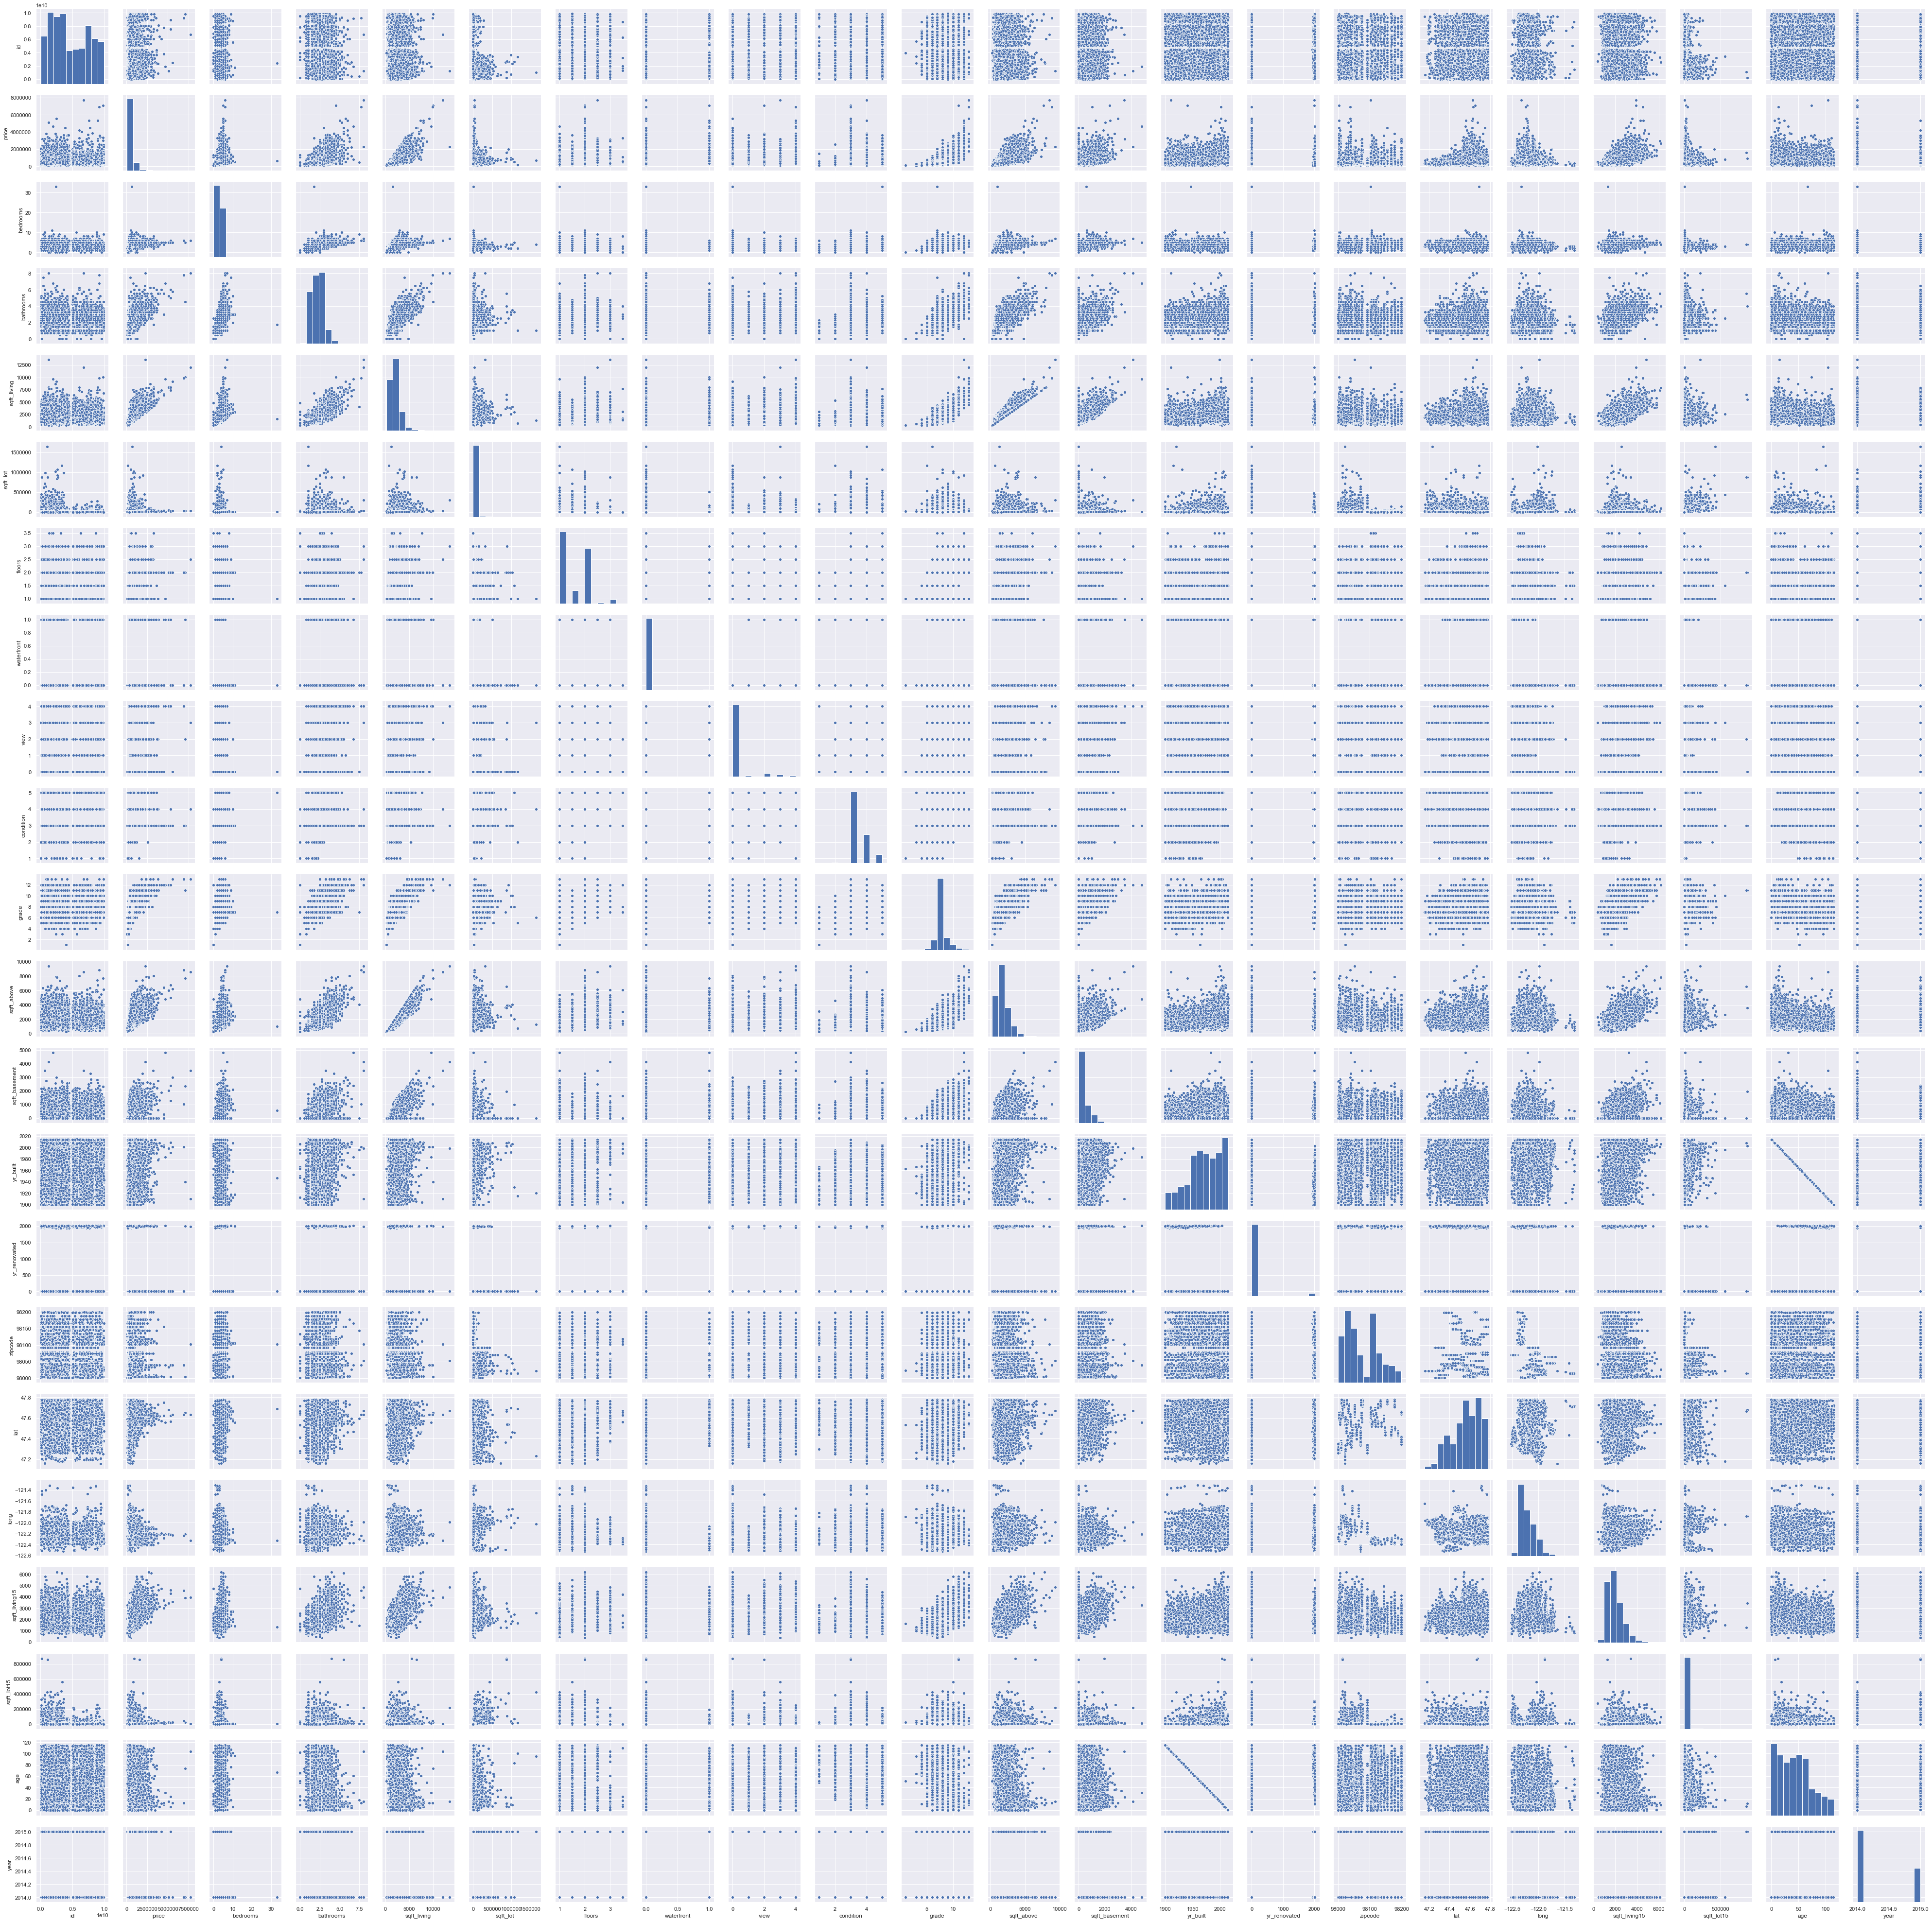

In [19]:
sns.set(color_codes = True)
sns.pairplot(data = dataset)

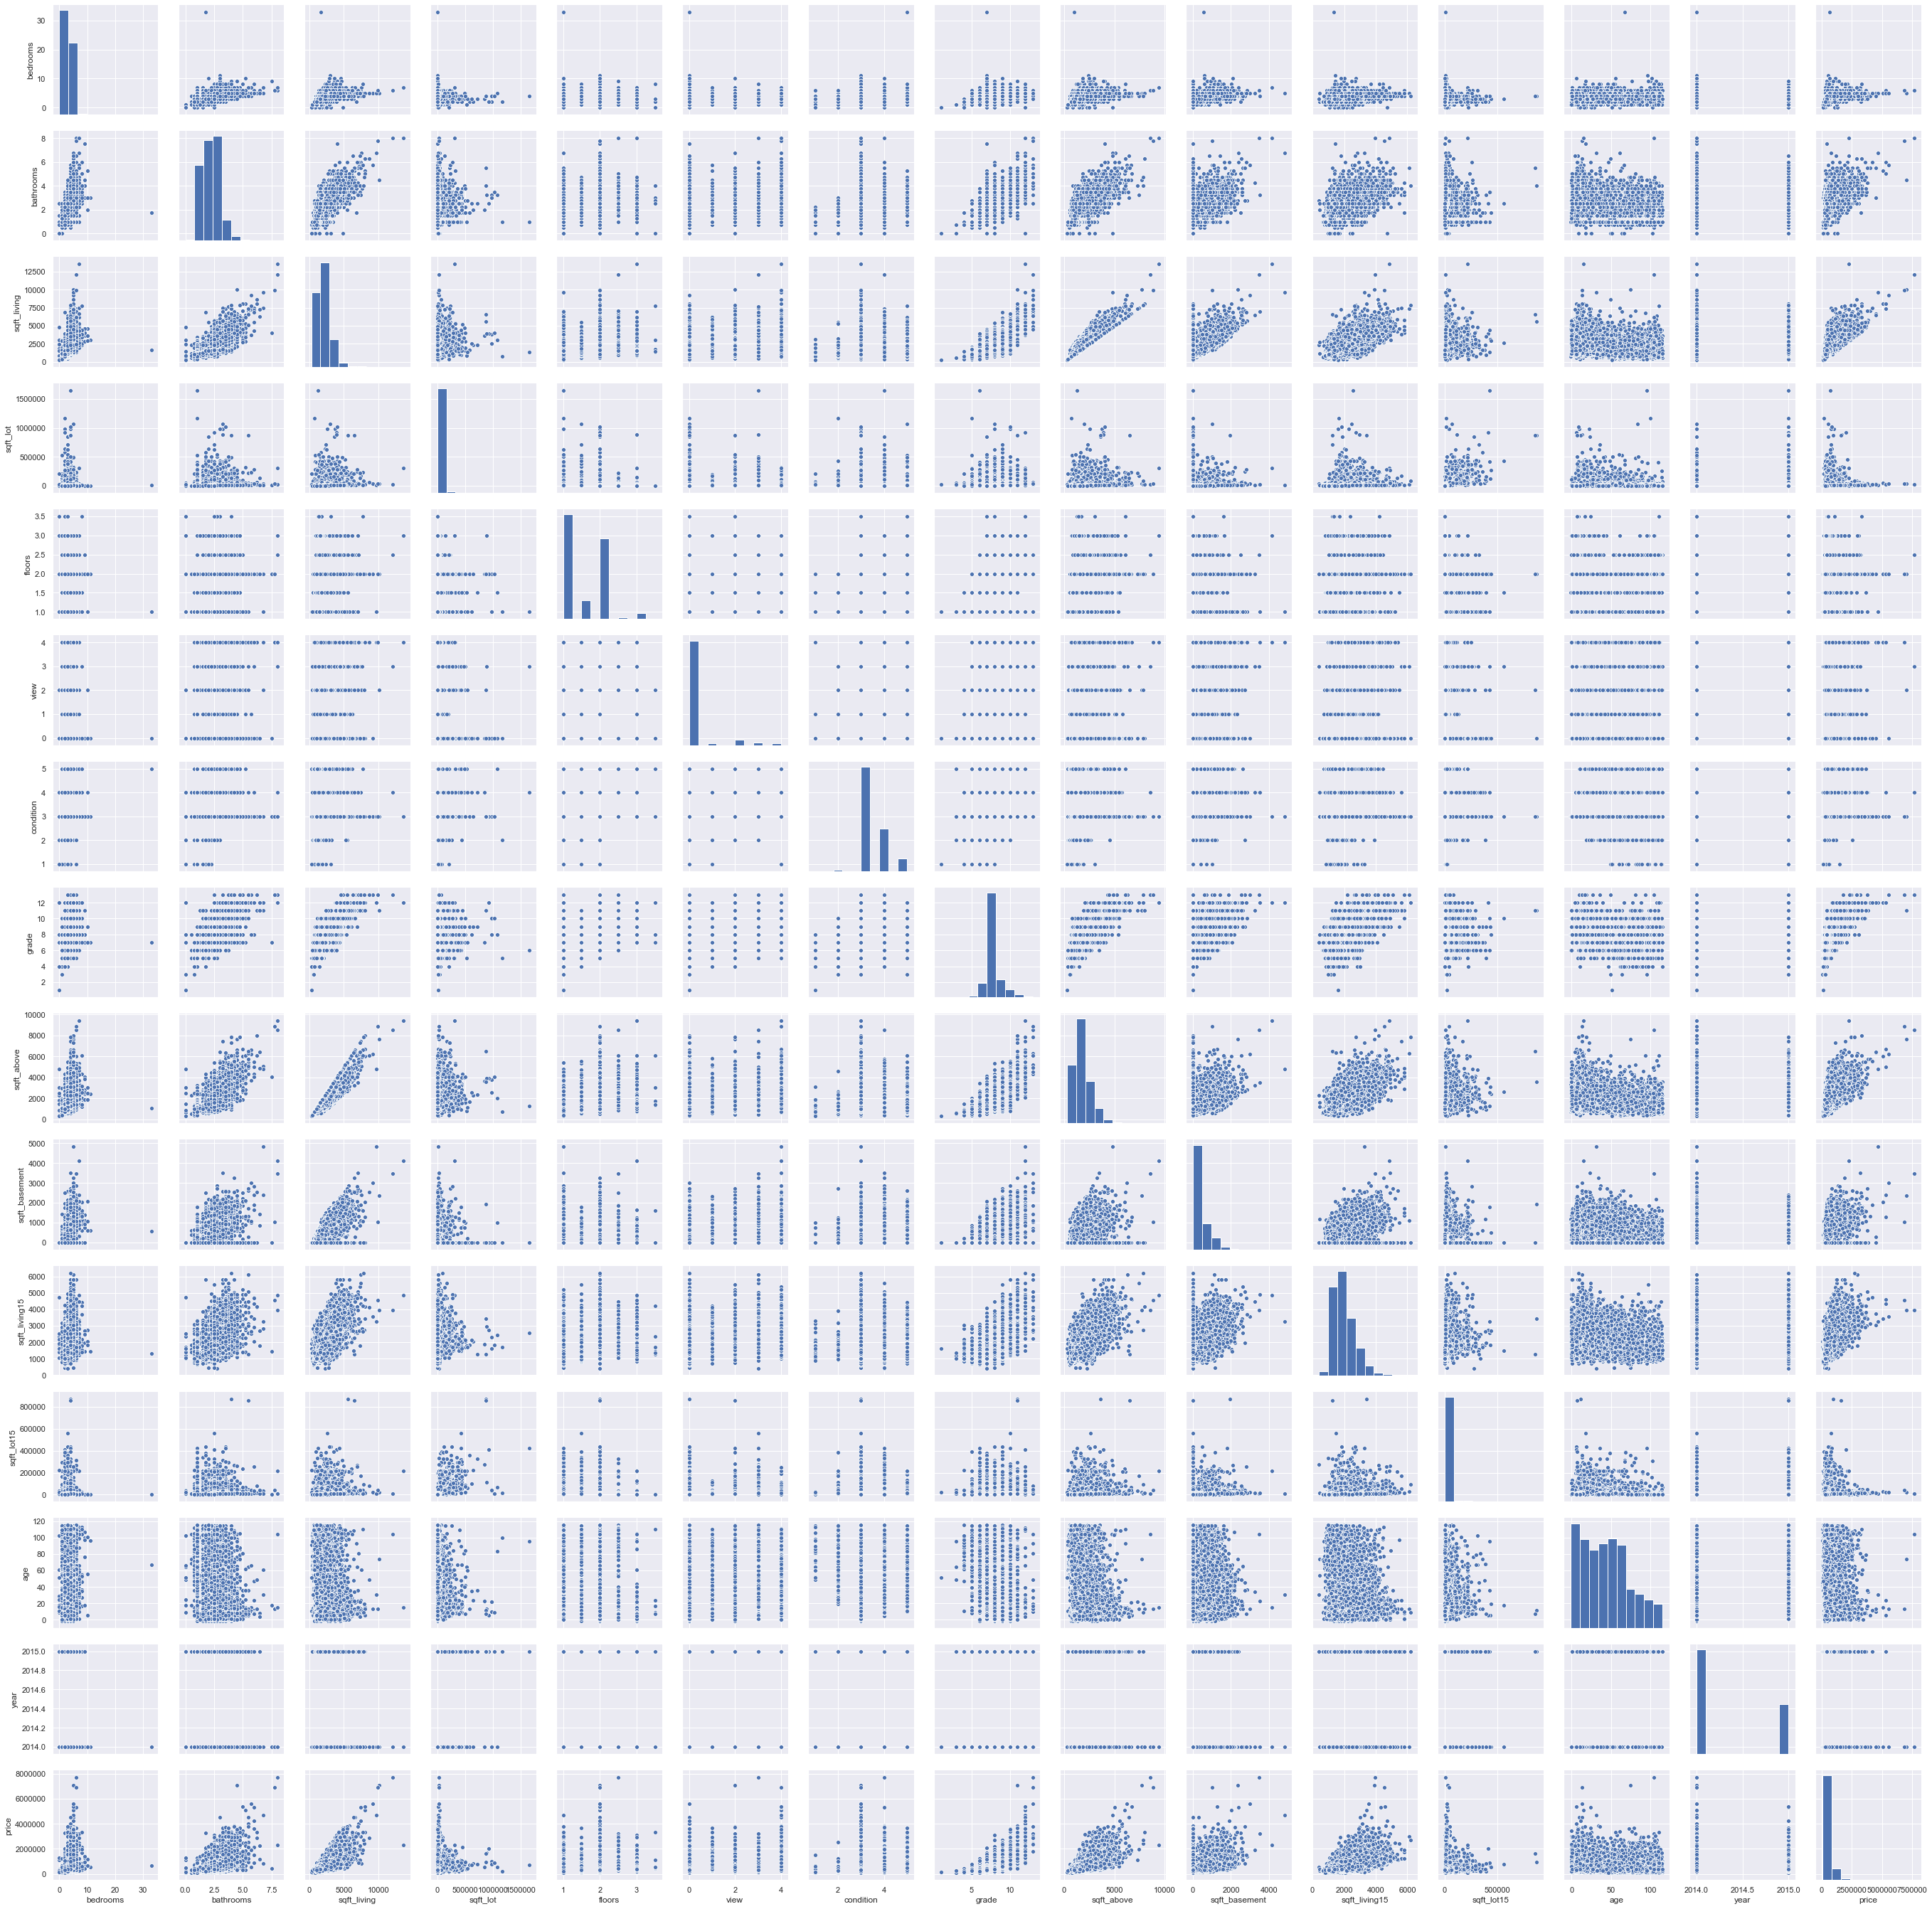

In [20]:
sns.set(color_codes = True)
sns.pairplot(data = final_dataset)

#### Correlation-Matrix

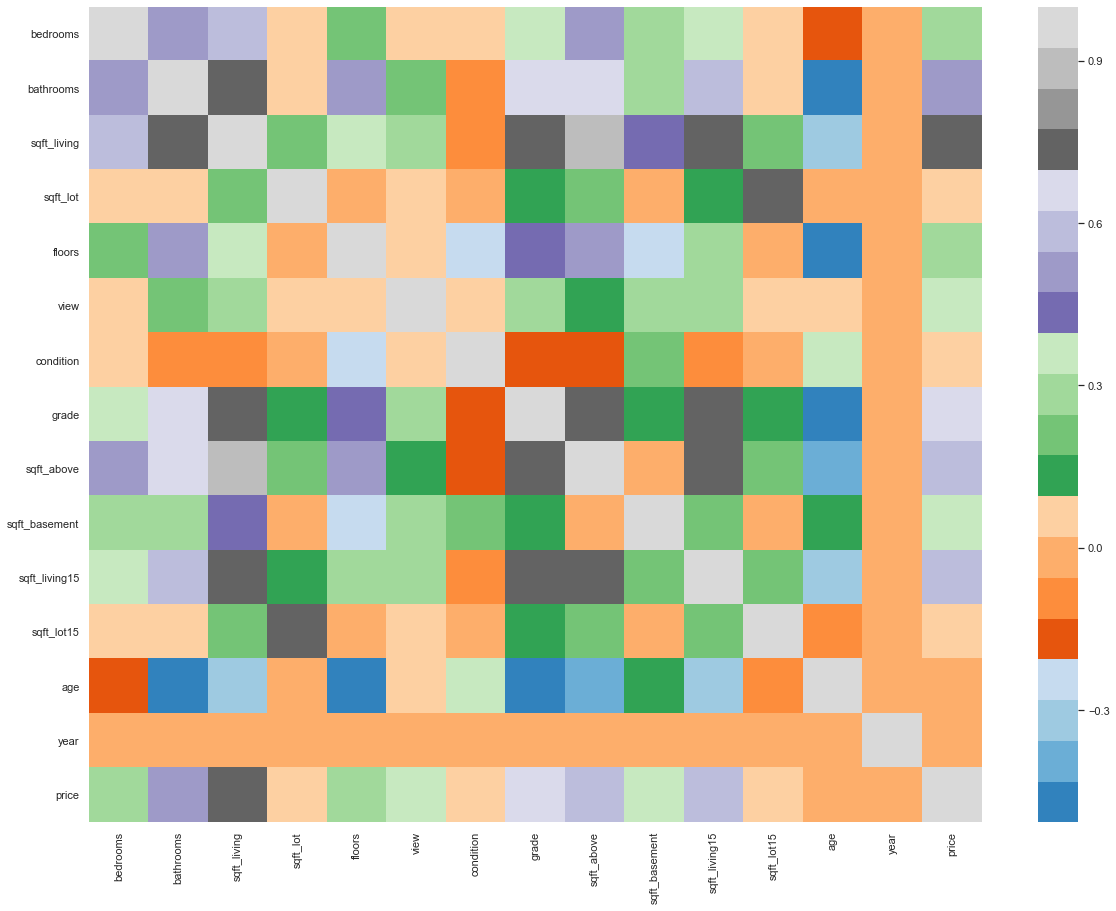

In [21]:
plt.subplots(figsize = (20 , 15))
sns.heatmap(final_dataset.corr() , cmap = 'tab20c')

# Building Model

In [22]:
train_data , test_data = train_test_split(dataset , test_size = 0.20 , random_state = 29)

In [23]:
print(train_data.shape)
print(test_data.shape)

(17290, 23)
(4323, 23)


In [24]:
print('Trainning split' , float(train_data.shape[0]) / float(dataset.shape[0]))
print('Testing split' , float(test_data.shape[0]) / float(dataset.shape[0]))

Trainning split 0.7999814926201823
Testing split 0.2000185073798177


In [25]:
train_data.describe()

id         price     bedrooms     bathrooms   sqft_living  \
count  1.729000e+04  1.729000e+04  17290.00000  17290.000000  17290.000000   
mean   4.570579e+09  5.396650e+05      3.36819      2.113013   2075.709717   
std    2.877158e+09  3.661713e+05      0.93937      0.771778    915.281197   
min    1.000102e+06  7.500000e+04      0.00000      0.000000    370.000000   
25%    2.120302e+09  3.220000e+05      3.00000      1.500000   1420.000000   
50%    3.904500e+09  4.500000e+05      3.00000      2.250000   1910.000000   
75%    7.304301e+09  6.450000e+05      4.00000      2.500000   2540.000000   
max    9.895000e+09  7.700000e+06     33.00000      8.000000  12050.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.729000e+04  17290.000000  17290.000000  17290.000000  17290.000000   
mean   1.484785e+04      1.494881      0.007577      0.234644      3.406362   
std    3.953259e+04      0.541782      0.086716      0.765495      0.648588   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.050000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.620000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.069675e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

       ...  sqft_basement      yr_built  yr_renovated       zipcode  \
count  ...   17290.000000  17290.000000  17290.000000  17290.000000   
mean   ...     288.785946   1970.889994     86.672354  98077.919780   
std    ...     439.875334     29.417507    406.763408     53.550547   
min    ...       0.000000   1900.000000      0.000000  98001.000000   
25%    ...       0.000000   1951.000000      0.000000  98033.000000   
50%    ...       0.000000   1974.000000      0.000000  98065.000000   
75%    ...     550.000000   1997.000000      0.000000  98118.000000   
max    ...    3500.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15           age  \
count  17290.000000  17290.000000   17290.000000   17290.000000  17290.000000   
mean      47.560586   -122.214538    1981.510758   12614.847831     43.432909   
std        0.138421      0.140513     683.809391   26513.546052     29.419499   
min       47.155900   -122.519000     399.000000     660.000000     -1.000000   
25%       47.473000   -122.328000    1480.000000    5100.000000     18.000000   
50%       47.572600   -122.232000    1830.000000    7620.000000     40.000000   
75%       47.678500   -122.126000    2350.000000   10080.000000     63.000000   
max       47.777600   -121.315000    6210.000000  858132.000000    115.000000   

               year  
count  17290.000000  
mean    2014.322903  
std        0.467600  
min     2014.000000  
25%     2014.000000  
50%     2014.000000  
75%     2015.000000  
max     2015.000000  

[8 rows x 22 columns]

In [26]:
train_x = train_data[features] 
train_y = train_data[target]
train_x

bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  condition  \
10423         4       2.50         2790      6540     2.0     0          3   
2482          4       1.50         1420      4923     1.5     0          4   
7688          3       1.00         1570      7727     1.0     2          4   
3545          3       1.75         1830      7969     1.0     0          3   
15527         3       1.75         1520      6559     1.0     0          4   
15382         5       3.25         3130     12087     2.0     0          3   
9552          5       2.25         2910      9454     1.0     1          3   
543           3       2.25         2120     40518     1.0     0          3   
11786         3       1.00          980      7560     1.0     0          3   
5899          4       3.50         3280      6603     2.0     0          3   
391           3       2.75         1980      3128     2.0     0          4   
21356         4       2.50         2280      5000     2.0     0          3   
6677          3       2.25         2070      7207     1.0     0          3   
12360         3       2.00         1710     10959     1.0     0          4   
19529         4       4.00         4360     12081     2.0     0          3   
15316         3       2.75         1720      6720     1.0     0          4   
12611         2       1.75         1210      7733     1.0     0          3   
972           3       1.25         1510     13737     1.0     3          4   
9450          3       2.00         1260      2550     2.0     0          3   
2059          3       3.25         2210      3600     2.0     0          3   
13107         3       3.50         3220      3960     2.0     4          3   
14153         4       2.50         1850      5444     2.0     0          5   
14466         1       0.75          420      6720     1.0     0          3   
10395         4       2.75         2520     14021     2.0     0          3   
541           4       2.50         1560      4350     2.0     0          3   
3005          4       2.50         1470      1612     2.0     0          3   
6056          4       2.00         1420      9301     1.0     0          4   
340           4       1.75         2560     43995     2.0     0          4   
1479          4       1.50         1840     10080     2.0     0          3   
17593         4       2.50         3010      9323     2.0     0          3   
...         ...        ...          ...       ...     ...   ...        ...   
10574         3       2.00         1290      7372     1.0     0          5   
4812          2       1.00          900      4600     1.0     0          3   
11694         3       2.00         1270     10227     1.0     0          4   
19835         2       2.50         2170      7665     1.0     2          3   
1027          4       1.00         1300      8400     1.5     0          4   
21016         3       2.25         1410      1287     2.0     0          3   
1035          4       3.00         3680      5854     1.0     3          3   
19360         4       2.75         2490      9714     1.0     0          4   
4035          8       6.00         4340      9415     2.0     0          3   
9018          5       2.50         3110     15783     1.0     0          3   
16863         2       2.25         1280      2574     2.0     0          3   
1191          4       1.00         1440      8250     1.0     0          3   
4111          3       2.50         3310    387684     1.0     0          3   
18562         3       2.50         2360      9938     1.0     0          3   
20644         4       3.25         3266      5969     2.0     0          3   
320           5       2.75         3150      7119     2.0     0          3   
9879          4       2.25         2920      6513     2.0     0          4   
21140         3       2.25         1481      2820     2.0     0          3   
19525         4       2.00         2120      7806     1.0     0          4   
20123         3       2.50   

In [27]:
test_x = test_data[features]
test_y = test_data[target]
test_y

price
15074   759000.0
5856    200000.0
19229   395000.0
2550    265000.0
7795    240000.0
10528   470000.0
502     342000.0
14869   249950.0
3625    356000.0
6372    850000.0
13029   644500.0
7284    506000.0
19938   320000.0
7432   2575000.0
10088   397000.0
5028    324950.0
10503   495000.0
7854   1000000.0
19313   342000.0
423     380000.0
20928   287000.0
9115    682500.0
6788    212000.0
9044   1348000.0
6424    257950.0
7968    432100.0
16246   400000.0
5149    489000.0
128     822500.0
20690   370000.0
...          ...
19218   589000.0
19009   441000.0
17236   219000.0
2579    378500.0
15566   745000.0
18838   540000.0
15753   525000.0
8729    587100.0
4090    462500.0
2047    528000.0
5282    515000.0
21606  1007500.0
13310   435000.0
21351   565000.0
11431   282000.0
19946   829995.0
11044   280000.0
19134   325000.0
10068   365000.0
9702    305000.0
15717   422500.0
8940    410000.0
1319    600000.0
5130    300000.0
19806   575000.0
13557   311000.0
11905   354000.0
12964   455500.0
6565    252750.0
15033   699000.0

[4323 rows x 1 columns]

#### Normalize

In [28]:
sc = StandardScaler()
sc.fit(train_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
normalized_train_x = sc.transform(train_x)
normalized_train_x

array([[ 0.67260853,  0.50143668,  0.78042785, ..., -0.23931281,
        -0.96649273, -0.69057524],
       [ 0.67260853, -0.79430987, -0.7164232 , ..., -0.2901185 ,
         1.44694247, -0.69057524],
       [-0.39196502, -1.44218315, -0.55253439, ..., -0.18435818,
         0.46117316,  1.44806813],
       ...,
       [-0.39196502,  0.50143668,  0.57283537, ..., -0.29083514,
        -1.13645296, -0.69057524],
       [ 0.67260853,  0.82537332,  1.92764946, ..., -0.01873994,
         0.29121294,  1.44806813],
       [-0.39196502, -1.44218315, -1.24086736, ..., -0.28721424,
         1.88883906,  1.44806813]])

In [30]:
normalized_test_x = sc.transform(test_x)
normalized_test_x

array([[ 0.67260853, -0.47037323,  0.02653937, ..., -0.3202172 ,
        -0.15068365, -0.69057524],
       [-1.45653857, -1.44218315, -1.50308944, ..., -0.27967071,
         0.59714134, -0.69057524],
       [-0.39196502, -0.79430987, -1.08790448, ..., -0.28985448,
         1.71887883, -0.69057524],
       ...,
       [-0.39196502, -0.47037323,  0.23413185, ...,  0.01580944,
        -0.04870751,  1.44806813],
       [ 0.67260853, -1.44218315, -0.92401568, ..., -0.18733788,
         0.90306975, -0.69057524],
       [ 0.67260853,  0.50143668,  0.39802065, ...,  0.11123512,
         0.01927658, -0.69057524]])

## Linear Regression

In [31]:
lm = LinearRegression()
lm.fit(normalized_train_x , train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lm.coef_

array([[-38293.36485495,  31214.1098302 ,  77949.48805925,
         -2706.48432878,  18262.99672464,  52594.86091622,
         15592.76466704, 140050.63348644,  66491.86445835,
         36830.58143023,  16366.11803335, -11996.22944321,
        106471.55137109,  11288.41386059]])

In [33]:
for idx , col_name in enumerate(train_x.columns):
    print('The co-efficient for {} is {}'.format(col_name , lm.coef_[0][idx]))

The co-efficient for bedrooms is -38293.36485494562
The co-efficient for bathrooms is 31214.109830203477
The co-efficient for sqft_living is 77949.48805925029
The co-efficient for sqft_lot is -2706.4843287815497
The co-efficient for floors is 18262.996724641816
The co-efficient for view is 52594.86091622363
The co-efficient for condition is 15592.764667043382
The co-efficient for grade is 140050.63348643764
The co-efficient for sqft_above is 66491.86445834835
The co-efficient for sqft_basement is 36830.58143023175
The co-efficient for sqft_living15 is 16366.118033348112
The co-efficient for sqft_lot15 is -11996.22944320738
The co-efficient for age is 106471.55137108784
The co-efficient for year is 11288.413860593559


In [34]:
print('Intercept of this model is ' , lm.intercept_[0])

Intercept of this model is  539665.0168883767


In [37]:
train_sizes , train_errors , validation_errors = learning_curve(estimator = LinearRegression() , 
                                                               X = train_x , y = train_y , cv = 5,
                                                               scoring = 'neg_mean_squared_error')

In [39]:
train_error_mean = -np.mean(train_errors , axis = 1)
validation_error_mean = -np.mean(validation_errors , axis = 1)

print('Mean training error\n\n' , pd.Series(train_error_mean , index = train_sizes))
print('\n')
print('\nMean validation error\n\n' , pd.Series(validation_error_mean , index = train_sizes))

Mean training error

 1383     4.281796e+10
4495     4.697245e+10
7607     4.718747e+10
10719    4.813646e+10
13832    4.870711e+10
dtype: float64



Mean validation error

 1383     4.954036e+10
4495     4.901424e+10
7607     4.903592e+10
10719    4.897339e+10
13832    4.893146e+10
dtype: float64


(10000000000.0, 49876475782.7854)

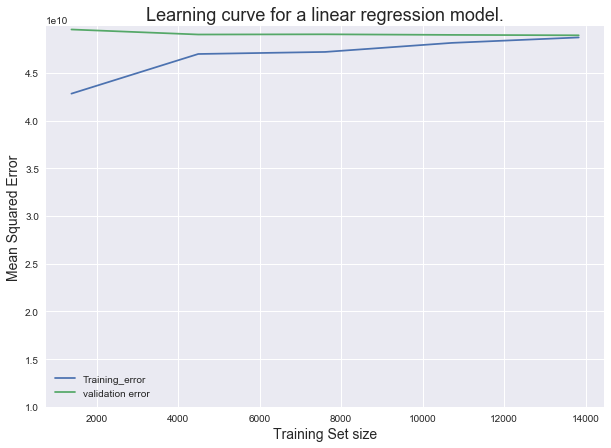

In [40]:
fig = plt.figure(figsize = (10 , 7))
plt.style.use('seaborn')

plt.plot(train_sizes , train_error_mean , label = 'Training_error')
plt.plot(train_sizes , validation_error_mean , label = 'validation error')

plt.ylabel('Mean Squared Error' , fontsize = 14)
plt.xlabel('Training Set size' , fontsize = 14)
plt.title('Learning curve for a linear regression model.' , fontsize = 18)
plt.legend()
plt.ylim(1e10)

In [41]:
pred = pd.DataFrame(lm.predict(normalized_test_x))
pred.columns = ['Predicted']

actual = pd.DataFrame(test_y.reset_index()['price'])
actual.columns = ['Actual']

In [42]:
lm_reg_pred = pd.concat([actual , pred] , axis =1)

In [43]:
lm_reg_pred.head(40)

Actual     Predicted
0    759000.0  3.583599e+05
1    200000.0  4.633436e+04
2    395000.0  4.501935e+05
3    265000.0  3.790257e+05
4    240000.0  2.332594e+05
5    470000.0  6.469559e+05
6    342000.0  5.618549e+05
7    249950.0  2.597630e+05
8    356000.0  4.444078e+05
9    850000.0  7.913048e+05
10   644500.0  6.111920e+05
11   506000.0  5.447185e+05
12   320000.0  4.306860e+05
13  2575000.0  1.012077e+06
14   397000.0  5.075645e+05
15   324950.0  4.463741e+05
16   495000.0  2.738227e+05
17  1000000.0  1.047320e+06
18   342000.0  5.318514e+05
19   380000.0  6.366388e+05
20   287000.0  4.018429e+05
21   682500.0  6.543974e+05
22   212000.0  1.990065e+05
23  1348000.0  1.031662e+06
24   257950.0  2.235095e+05
25   432100.0  5.729735e+05
26   400000.0  2.502774e+05
27   489000.0  9.199965e+05
28   822500.0  6.829216e+05
29   370000.0  4.056702e+05
30   195000.0  2.905081e+05
31   862500.0  1.152826e+06
32   359900.0  5.621040e+05
33   317000.0  4.097048e+05
34   395000.0  3.266504e+05
35   343000.0  4.883370e+05
36   375000.0  2.916416e+05
37   678100.0  7.004490e+05
38   419354.0  4.919981e+05
39  1238000.0  1.517053e+06

In [44]:
r2_score(lm_reg_pred.Actual , lm_reg_pred.Predicted)

0.6478926143531565

## Decision Tree Regression

In [45]:
dt = DecisionTreeRegressor()
dt.fit(train_x , train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [46]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [47]:
dt_pred = dt.predict(test_x)

In [48]:
sc = r2_score(test_y , dt_pred)
sc

0.5217000484165357

### Cross-validation

In [49]:
n_folds = 5

In [50]:
parameters = {'min_samples_split': range(5, 200, 10)}

tree_split = GridSearchCV(dt , parameters , cv=n_folds , scoring = 'neg_mean_squared_error',  return_train_score = True , n_jobs = -1)
tree_split.fit(train_x , train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_split': range(5, 200, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             sco

In [51]:
print(tree_split.best_params_)

{'min_samples_split': 105}


In [52]:
parameters = {'max_features':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]}

grd_search_max_ft = GridSearchCV(dt , parameters , cv = n_folds , return_train_score = True , n_jobs = -1)

grd_search_max_ft.fit(train_x, train_y)
print('Best parameter for max_depth: ',grd_search_max_ft.best_params_)

scores = grd_search_max_ft.cv_results_
pd.DataFrame(scores).head()

Best parameter for max_depth:  {'max_features': 11}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.107308      0.004303         0.014963        0.010686   
1       0.177523      0.056854         0.009372        0.001353   
2       0.284034      0.064109         0.026132        0.024841   
3       0.319741      0.032254         0.017955        0.016538   
4       0.290221      0.105930         0.009177        0.002917   

  param_max_features               params  split0_test_score  \
0                  1  {'max_features': 1}           0.401455   
1                  2  {'max_features': 2}           0.346850   
2                  3  {'max_features': 3}           0.459332   
3                  4  {'max_features': 4}           0.472640   
4                  5  {'max_features': 5}           0.422704   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.337760           0.247290           0.314977  ...   
1           0.370052           0.435711           0.271628  ...   
2           0.393892           0.444582           0.455124  ...   
3           0.459775           0.396118           0.519906  ...   
4           0.438742           0.486694           0.409353  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.317904        0.051501               14            0.999901   
1         0.359367        0.052863               13            0.999901   
2         0.442092        0.024637               12            0.999901   
3         0.452850        0.043650               11            0.999901   
4         0.453185        0.038036               10            0.999901   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.999916            0.999868            0.999921   
1            0.999916            0.999890            0.999915   
2            0.999916            0.999890            0.999922   
3            0.999916            0.999889            0.999922   
4            0.999916            0.999890            0.999922   

   split4_train_score  mean_train_score  std_train_score  
0            0.999897          0.999901         0.000018  
1            0.999900          0.999904         0.000010  
2            0.999897          0.999905         0.000012  
3            0.999900          0.999906         0.000012  
4            0.999900          0.999906         0.000012  

[5 rows x 21 columns]

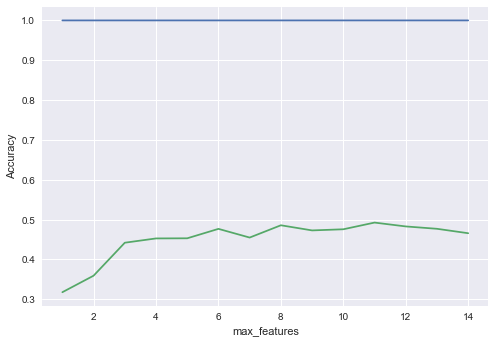

In [53]:
plt.figure()
plt.plot(scores["param_max_features"],scores["mean_train_score"],label="Training accuracy")
plt.plot(scores["param_max_features"],scores["mean_test_score"],label="Test accuracy")
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.show()

In [54]:
parameters = {'max_depth': range(2, 30, 2)}

grd_search_max = GridSearchCV(dt , parameters , cv = n_folds , return_train_score = True , n_jobs = -1)

grd_search_max.fit(train_x , train_y)
print('Best parameter for max_depth: ',grd_search_max.best_params_)

scores = grd_search_max.cv_results_
pd.DataFrame(scores).head()

Best parameter for max_depth:  {'max_depth': 6}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.087764      0.056562         0.006383        0.002410   
1       0.138238      0.053009         0.009974        0.009524   
2       0.132647      0.006994         0.014263        0.008700   
3       0.215734      0.013801         0.005187        0.001466   
4       0.266906      0.022271         0.009975        0.004186   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.428076           0.488629   
1               4   {'max_depth': 4}           0.558968           0.590996   
2               6   {'max_depth': 6}           0.606600           0.633176   
3               8   {'max_depth': 8}           0.571116           0.568027   
4              10  {'max_depth': 10}           0.521844           0.564599   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.482224           0.453894  ...         0.459198        0.023022   
1           0.603670           0.599296  ...         0.593137        0.018470   
2           0.642352           0.650396  ...         0.637654        0.017299   
3           0.619443           0.634278  ...         0.603756        0.028322   
4           0.574256           0.619555  ...         0.572798        0.031533   

   rank_test_score  split0_train_score  split1_train_score  \
0               14            0.475656            0.462260   
1                3            0.628885            0.625619   
2                1            0.718411            0.721023   
3                2            0.785210            0.798633   
4                4            0.848954            0.864763   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.463351            0.468733            0.471928   
1            0.635408            0.636448            0.624128   
2            0.724872            0.727691            0.710241   
3            0.802679            0.796426            0.787675   
4            0.864536            0.855830            0.849412   

   mean_train_score  std_train_score  
0          0.468386         0.005068  
1          0.630097         0.005014  
2          0.720448         0.006012  
3          0.794125         0.006631  
4          0.856699         0.006933  

[5 rows x 21 columns]

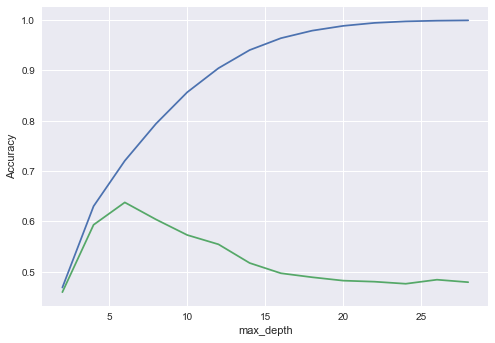

In [55]:
plt.figure()
plt.plot(scores["param_max_depth"],scores["mean_train_score"],label="Training accuracy")
plt.plot(scores["param_max_depth"],scores["mean_test_score"],label="Test accuracy")
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()


In [56]:
pd.set_option('display.float_format',lambda x: '%3f' % x)
model = grd_search_max.best_estimator_

In [57]:
train_sizes , train_errors , validation_errors = learning_curve(estimator = model , 
                                                               X = train_x , y = train_y , cv = 5,
                                                               scoring = 'neg_mean_squared_error')

In [58]:
train_error_mean = -np.mean(train_errors , axis = 1)
validation_error_mean = -np.mean(validation_errors , axis = 1)

print('Mean training error\n\n' , pd.Series(train_error_mean , index = train_sizes))
print('\n')
print('\nMean validation error\n\n' , pd.Series(validation_error_mean , index = train_sizes))

Mean training error

 1383    22716671296.871075
4495    30574765050.019215
7607    33772890783.156342
10719   36049811546.504684
13832   37480530198.914185
dtype: float64



Mean validation error

 1383    65848808698.622314
4495    57695619621.899612
7607    55032710048.003799
10719   51891863594.678307
13832   48409290043.957275
dtype: float64


(10000000000.0, 68005415568.70988)

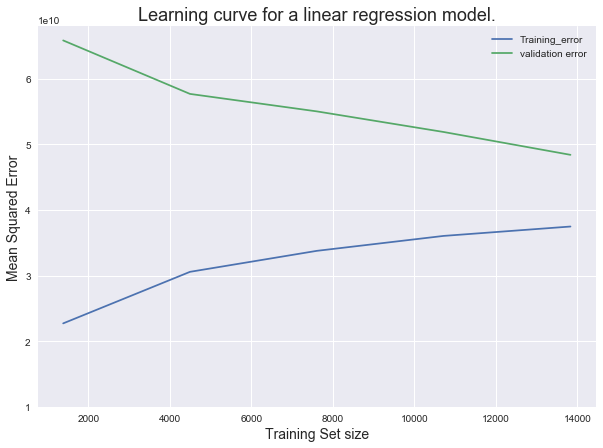

In [59]:
fig = plt.figure(figsize = (10 , 7))
plt.style.use('seaborn')

plt.plot(train_sizes , train_error_mean , label = 'Training_error')
plt.plot(train_sizes , validation_error_mean , label = 'validation error')

plt.ylabel('Mean Squared Error' , fontsize = 14)
plt.xlabel('Training Set size' , fontsize = 14)
plt.title('Learning curve for a linear regression model.' , fontsize = 18)
plt.legend()
plt.ylim(1e10)

In [60]:
parameters = {'min_samples_leaf': range(30, 400, 50)}

grd_search_lf = GridSearchCV(dt , parameters , cv = n_folds , return_train_score = True , n_jobs = -1)

grd_search_lf.fit(train_x, train_y)
print('Best parameter for min_samples_leaf: ',grd_search_lf.best_params_)

scores = grd_search_lf.cv_results_
pd.DataFrame(scores).head()

Best parameter for min_samples_leaf:  {'min_samples_leaf': 30}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.189797      0.023063         0.006779        0.003048   
1       0.149729      0.006900         0.009692        0.006832   
2       0.138236      0.013021         0.006579        0.001850   
3       0.136379      0.011600         0.007994        0.003022   
4       0.138816      0.005304         0.005587        0.000797   

  param_min_samples_leaf                     params  split0_test_score  \
0                     30   {'min_samples_leaf': 30}           0.653942   
1                     80   {'min_samples_leaf': 80}           0.622066   
2                    130  {'min_samples_leaf': 130}           0.596393   
3                    180  {'min_samples_leaf': 180}           0.590415   
4                    230  {'min_samples_leaf': 230}           0.543756   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.671672           0.681329           0.629913  ...   
1           0.648101           0.659049           0.611906  ...   
2           0.638148           0.630044           0.604307  ...   
3           0.633051           0.630445           0.575673  ...   
4           0.608048           0.601904           0.568889  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.660233        0.017615                1            0.726163   
1         0.628265        0.022066                2            0.659688   
2         0.614359        0.016535                3            0.632373   
3         0.605487        0.022615                4            0.624676   
4         0.576389        0.024758                5            0.592360   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.716524            0.718291            0.724563   
1            0.655579            0.647172            0.662784   
2            0.627714            0.628866            0.639154   
3            0.617116            0.616896            0.609007   
4            0.581890            0.584220            0.596095   

   split4_train_score  mean_train_score  std_train_score  
0            0.721075          0.721323         0.003639  
1            0.655015          0.656047         0.005267  
2            0.627896          0.631201         0.004316  
3            0.619373          0.617414         0.005052  
4            0.585910          0.588095         0.005301  

[5 rows x 21 columns]

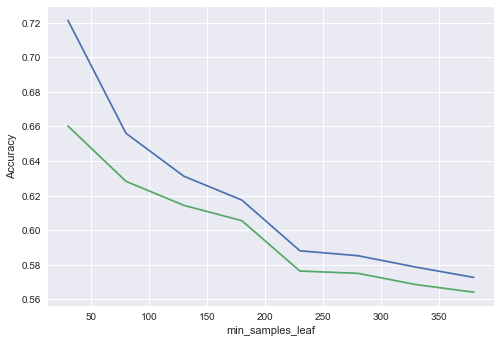

In [61]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"],scores["mean_train_score"],label="Training accuracy")
plt.plot(scores["param_min_samples_leaf"],scores["mean_test_score"],label="Test accuracy")
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.show()

In [62]:
dt = DecisionTreeRegressor(max_depth = 10 , min_samples_leaf =  30 , min_samples_split = 95 , max_features = 13)
dt.fit(train_x , train_y)
y_pred_dt = dt.predict(test_x)
sc_dt = r2_score(test_y , y_pred_dt)
sc_dt

0.6958814945406746

In [65]:
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
rf = RandomForestRegressor(n_estimators = 50 , max_depth = 8 , min_samples_leaf = 30 , max_features = 6 , min_samples_split = 60)
rf.fit(train_x , train_y)

y_pred_rf = rf.predict(test_x)

ac_rf = r2_score(test_y , y_pred_rf)
print(ac_rf*100)

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


71.17292362772115


In [66]:
shallow_tree = DecisionTreeRegressor()
shallow_tree.fit(train_x , train_y)


ABC = AdaBoostRegressor(base_estimator = shallow_tree , learning_rate = 1.3 , n_estimators = 30)
ABC.fit(train_x , train_y)
y_pred_ab = ABC.predict(test_x)
ac_ab = r2_score(test_y , y_pred_ab)
print(ac_ab*100)

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


70.36227058324727
